<a href="https://colab.research.google.com/github/2300032728/home/blob/main/dav_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Sample dataset
data = [10, 12, 12, 13, 12, 14, 13, 15, 100, 12, 14, 13, 16, 200, 13, 14]

df = pd.DataFrame(data, columns=['Value'])

print("Original Data:\n", df)

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

print("\nIQR Outliers:\n", iqr_outliers)


z_scores = np.abs(stats.zscore(df['Value']))
threshold = 3
zscore_outliers = df[z_scores > threshold]

print("\nZ-Score Outliers:\n", zscore_outliers)

Original Data:
     Value
0      10
1      12
2      12
3      13
4      12
5      14
6      13
7      15
8     100
9      12
10     14
11     13
12     16
13    200
14     13
15     14

IQR Outliers:
     Value
8     100
13    200

Z-Score Outliers:
     Value
13    200


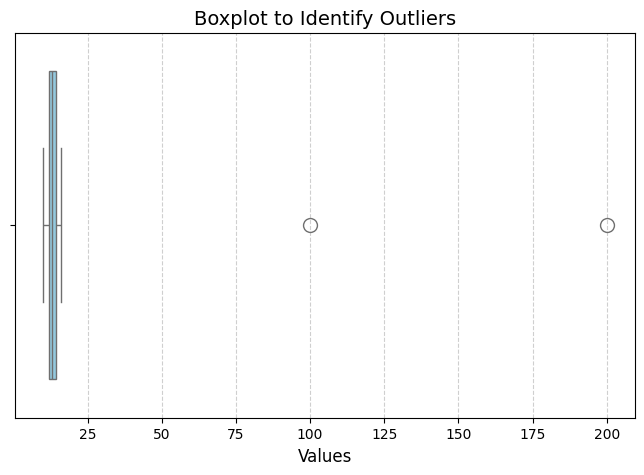

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = [10, 12, 12, 13, 12, 14, 13, 15, 100, 12, 14, 13, 16, 200, 13, 14]

df = pd.DataFrame(data, columns=['Value'])


plt.figure(figsize=(8,5))
sns.boxplot(x=df['Value'], color="skyblue", fliersize=10)

plt.title("Boxplot to Identify Outliers", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

Original Dataset:
       Age  Income Student Buys_Computer
0    <=30      40      No            No
1    <=30      42      No            No
2   31-40      39     Yes           Yes
3    >=40      41     Yes           Yes
4    <=30      43     Yes           Yes
5   31-40      40      No            No
6    >=40     300     Yes           Yes
7    <=30      45      No            No
8    >=40      38     Yes           Yes
9   31-40     410      No            No
10   <=30      44     Yes           Yes
11   >=40      42      No            No
12  31-40      39     Yes           Yes
13   >=40      37      No            No
14   <=30     450     Yes           Yes

--- Impact of Outliers ---
With Outliers:
count     15.000000
mean     110.000000
std      146.183349
min       37.000000
25%       39.500000
50%       42.000000
75%       44.500000
max      450.000000
Name: Income, dtype: float64

Without Outliers:
count    12.000000
mean     40.833333
std       2.443296
min      37.000000
25%      39.00

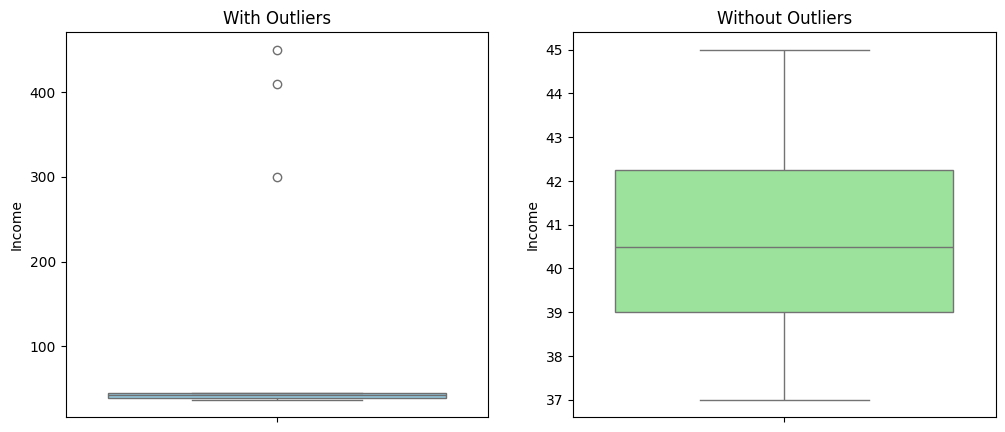

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Age': ['<=30','<=30','31-40','>=40','<=30','31-40','>=40','<=30','>=40','31-40','<=30','>=40','31-40','>=40','<=30'],
    'Income': [40, 42, 39, 41, 43, 40, 300, 45, 38, 410, 44, 42, 39, 37, 450],  # Notice huge outliers (300, 410, 450)
    'Student': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes'],
    'Buys_Computer': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes']
}

df = pd.DataFrame(data)
print("Original Dataset:\n", df)

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

print("\n--- Impact of Outliers ---")
print("With Outliers:")
print(df['Income'].describe())

print("\nWithout Outliers:")
print(df_no_outliers['Income'].describe())


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['Income'], color="skyblue")
plt.title("With Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=df_no_outliers['Income'], color="lightgreen")
plt.title("Without Outliers")

plt.show()

In [4]:
import pandas as pd


customer_data = {
    'Customer_ID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 28]
}
df_customers = pd.DataFrame(customer_data)


purchase_data = {
    'Customer_ID': [101, 102, 104, 106],
    'Product': ['Laptop', 'Mobile', 'Tablet', 'Headphones'],
    'Amount': [75000, 20000, 30000, 5000]
}
df_purchases = pd.DataFrame(purchase_data)

print("Customer Dataset:\n", df_customers, "\n")
print("Purchase Dataset:\n", df_purchases, "\n")


df_inner = pd.merge(df_customers, df_purchases, on='Customer_ID', how='inner')

df_left = pd.merge(df_customers, df_purchases, on='Customer_ID', how='left')


df_outer = pd.merge(df_customers, df_purchases, on='Customer_ID', how='outer')

print("\n--- Data Integration Results ---")
print("\nInner Join (Only matching records):\n", df_inner)
print("\nLeft Join (All customers, purchases if available):\n", df_left)
print("\nOuter Join (All records from both datasets):\n", df_outer)

Customer Dataset:
    Customer_ID     Name  Age
0          101    Alice   25
1          102      Bob   30
2          103  Charlie   35
3          104    David   40
4          105      Eva   28 

Purchase Dataset:
    Customer_ID     Product  Amount
0          101      Laptop   75000
1          102      Mobile   20000
2          104      Tablet   30000
3          106  Headphones    5000 


--- Data Integration Results ---

Inner Join (Only matching records):
    Customer_ID   Name  Age Product  Amount
0          101  Alice   25  Laptop   75000
1          102    Bob   30  Mobile   20000
2          104  David   40  Tablet   30000

Left Join (All customers, purchases if available):
    Customer_ID     Name  Age Product   Amount
0          101    Alice   25  Laptop  75000.0
1          102      Bob   30  Mobile  20000.0
2          103  Charlie   35     NaN      NaN
3          104    David   40  Tablet  30000.0
4          105      Eva   28     NaN      NaN

Outer Join (All records from both d